In [1]:
import pandas as pd
import os, json

data_dir = "C:\\Users\\Zjaffen1\\Desktop\\Projects\\series analysis"
intents_to_check = "march_all.csv"

In [2]:
os.chdir(data_dir)
df_check = pd.read_csv(intents_to_check)

C:\Users\Zjaffen1\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
intents = ['payment_processing', 'thank', 'view_deals',
       'line_add_byo', 'affirm', 'speak_spanish', 'bill_pay',
       'plan_addons', 'shop_device', 'pa_change_dates', 'out_of_scope',
       'worry_shutoff', 'manage_plan', 'order_status', 'line_add',
       'broken', 'out_of_scope_tmo', 'transfer_to_expert',
       'pa_cannot_pay', 'bill_view', 'home_internet',
       'pa_edit_cancel', 'lost_phone', 'deny', 'why', 'shop_device_apple',
       'line_review', 'home_internet_support', 'setup_autopay',
       'balance_eip', 'tvision', 'closing', 'pa_create', 'main_menu',
       'line_suspend', 'bill_shock',
       'bill_general',
       'pa_view_existing', 'pa_update_payment',
       'work_anywhere', 'balance_view', 'self_service']

excluded = ['greeting', 'nlu_fallback', 'end_conversation']

#which intents to grab from list of all intents
to_check = ["pa_cannot_pay","pa_create"]


In [4]:
# "truth" is a mask to filter out all intents not included in "to_check"
df_check['truth'] = df_check['top_intent'].apply(lambda x: x in to_check)
df_trim = df_check[df_check['truth']]
print("Before: ", str(len(df_check)), "\nAfter: ", str(len(df_trim)))

Before:  1092381 
After:  13716


In [6]:
df_trim.head()

,top_intent,confidence,_time,truth
42,pa_cannot_pay,0.6135014891624451,2021-03-26T06:37:08.000+0000,True
71,pa_cannot_pay,0.8499577641487122,2021-03-21T15:46:25.000+0000,True
95,pa_cannot_pay,0.9973898530006409,2021-03-21T15:31:12.000+0000,True
231,pa_create,0.9301363825798035,2021-03-23T14:59:31.000+0000,True
293,pa_cannot_pay,0.961767852306366,2021-03-23T15:04:56.000+0000,True


In [7]:
df_trim['_time'] = df_trim['_time'].apply(lambda x: x[:10])

<ipython-input-7-f1b239781ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['_time'] = df_trim['_time'].apply(lambda x: x[:10])


In [8]:
df_trim['day'] = df_trim['_time'].apply(lambda x: pd.to_datetime(x).day)

<ipython-input-8-535a2c26c351>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['day'] = df_trim['_time'].apply(lambda x: pd.to_datetime(x).day)


In [9]:
df_trim['confidence'] = df_trim['confidence'].apply(lambda x: float(x))

<ipython-input-9-5eaa09293daa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trim['confidence'] = df_trim['confidence'].apply(lambda x: float(x))


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [11]:
df_trim.dtypes

top_intent     object
confidence    float64
_time          object
truth            bool
day             int64
dtype: object

[Text(0.5, 0, 'Mar 2021 Day')]

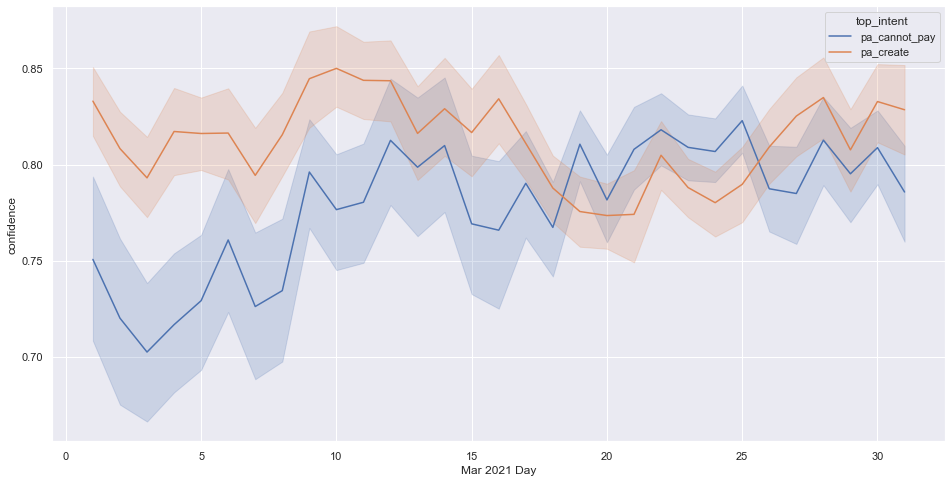

In [12]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(x="day", y="confidence", hue="top_intent",
             data=df_trim)

ax.set(xlabel='Mar 2021 Day')

In [13]:
df2 = df_trim.value_counts(['day', 'top_intent'])

In [14]:
df2.head()

day  top_intent   
24   pa_cannot_pay    454
23   pa_cannot_pay    440
22   pa_cannot_pay    409
18   pa_create        389
23   pa_create        381
dtype: int64

In [15]:
df3 = df2.reset_index()

In [16]:
df3 = df3.rename(columns={0:"count"})

In [17]:
df3.head()

,day,top_intent,count
0,24,pa_cannot_pay,454
1,23,pa_cannot_pay,440
2,22,pa_cannot_pay,409
3,18,pa_create,389
4,23,pa_create,381


[Text(0.5, 0, 'Mar 2021 Day')]

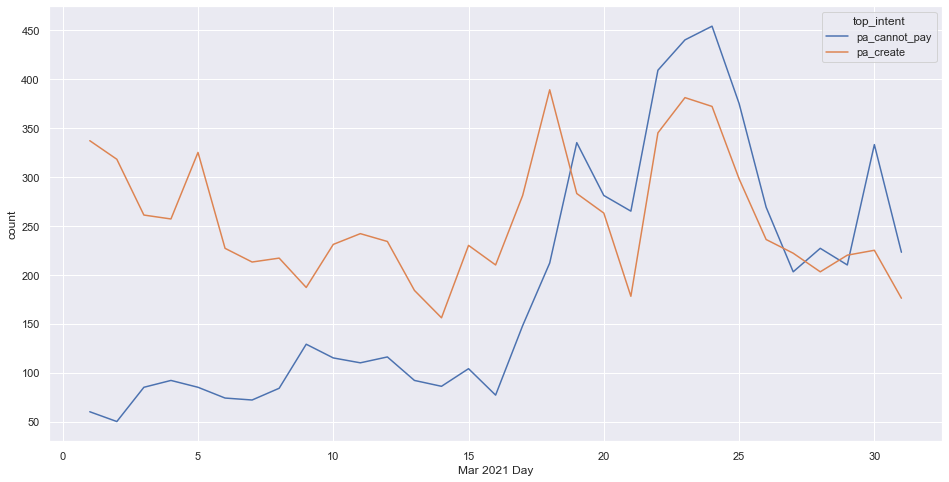

In [18]:
fig, ax = plt.subplots(figsize=(16,8))

ax = sns.lineplot(x="day", y="count",
             hue="top_intent",
             data=df3)

ax.set(xlabel='Mar 2021 Day')